# easy_ViTPose demo
Be sure to enable GPU runtime

In [ ]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
!cd easy_ViTPose/ && pip install -r requirements.txt && pip install -e .
!pip install huggingface_hub

Cloning into 'easy_ViTPose'...
remote: Enumerating objects: 797, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 797 (delta 167), reused 130 (delta 108), pack-reused 584
Receiving objects: 100% (797/797), 7.55 MiB | 21.84 MiB/s, done.
Resolving deltas: 100% (474/474), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 104.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 51.7 MB/s eta 0:00:

# Restart the runtime (runtime -> restart runtime) to update installed packages versions

# Download the models

In [ ]:
#@title Choose model and run this cell
#@markdown Only ONNX and torch models here

MODEL_SIZE = 'l'  #@param ['s', 'b', 'l', 'h']
YOLO_SIZE = 's'  #@param ['s', 'n']
DATASET = 'coco_25'  #@param ['coco_25', 'coco', 'wholebody', 'mpii', 'aic', 'ap10k', 'apt36k']
ext = '.pth'
ext_yolo = '.pt'

In [ ]:
import os
from huggingface_hub import hf_hub_download
MODEL_TYPE = "torch"
YOLO_TYPE = "torch"
REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, f'{DATASET}/vitpose-' + MODEL_SIZE + f'-{DATASET}') + ext
FILENAME_YOLO = 'yolov8/yolov8' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

# Run inference

In [ ]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
from easy_ViTPose import VitInference
model = VitInference(model_path, yolo_path, MODEL_SIZE,
                     dataset=DATASET, yolo_size=320, is_video=False)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv8 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 54

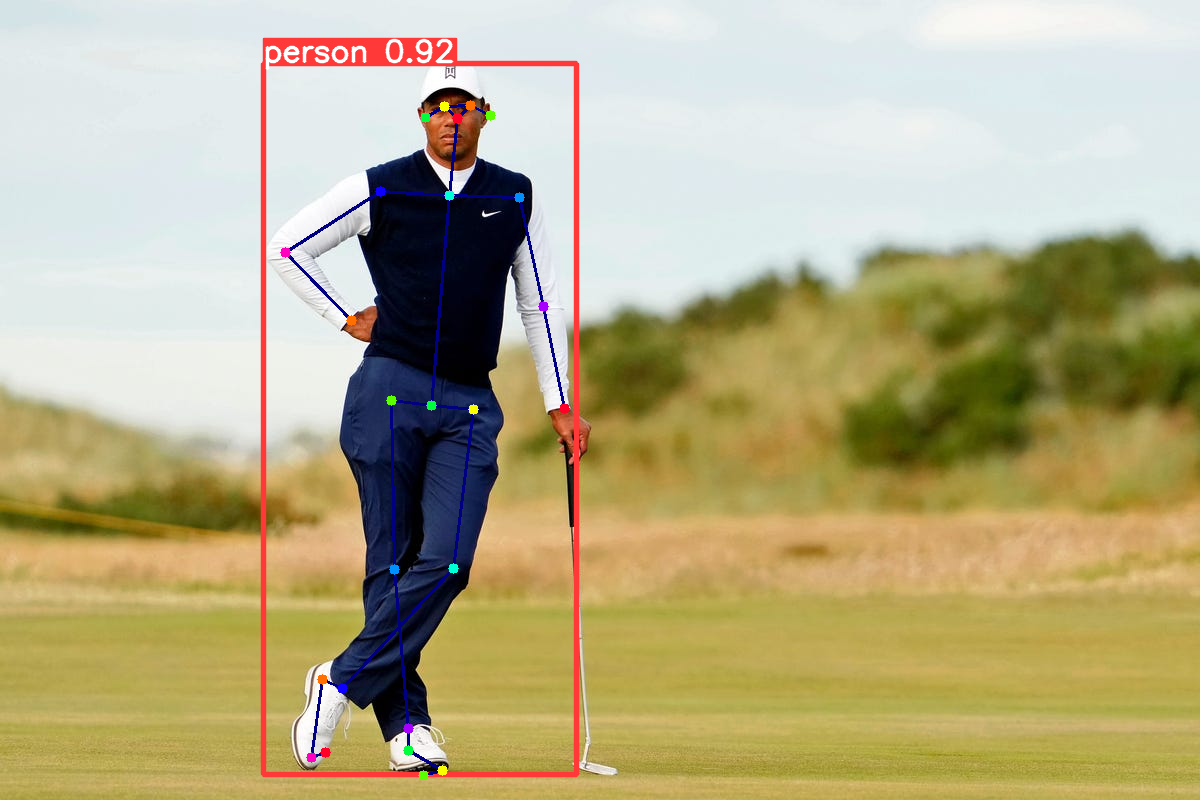

In [ ]:
# Run inference on example image
import numpy as np
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

# Load image and run inference
url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open(BytesIO(urlopen(url).read())), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])

Saving img1.jpg to img1.jpg


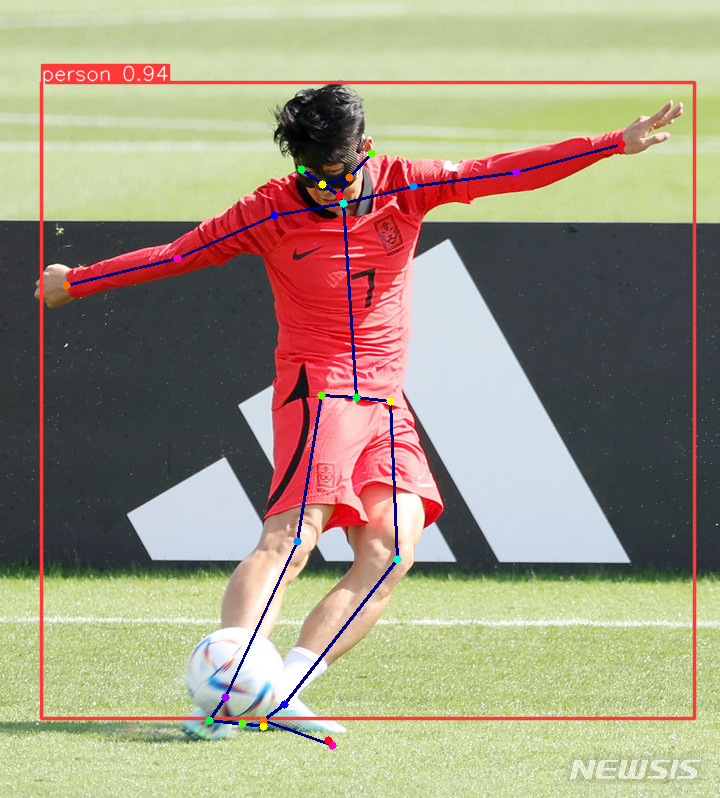

In [ ]:
#@title Custom image
from google.colab import files
import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])